In [48]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

In [49]:
data_df = pd.read_excel("consumo_material_clean.xlsx", sheet_name='Sheet1')
data_df.describe()

,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA
count,15698.000000,15698.000000,15698.000000,15698.000000
mean,369.235062,83.185820,122.893353,569.473009
std,758.202692,195.915475,221.454340,748.721488
min,1.000000,1.000000,0.989571,0.000000
25%,40.000000,5.000000,13.959000,121.000000
50%,120.000000,10.000000,44.000000,322.080000
75%,330.000000,50.000000,102.802000,719.949286
max,10000.000000,2000.000000,2458.500000,11439.928600


In [50]:
data_df.head()

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
0,E99808,01/01/23,1595724/23,178567.1,60,10,62.590000,375.540000,Compra menor,1-2-60,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3
1,B41691,01/02/16,72714/16,400403,40,10,102.803729,411.214916,Compra menor,0-10-1,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...
2,E64543,01/02/16,71961/16,403770,20,5,12.100000,48.400000,Compra menor,0-4-111,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18
3,E65007,01/02/16,72773/16,20415,100,50,215.325000,430.650000,Concurso,0-10-1,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11
4,E64911,01/02/17,86159/17,20701,300,300,792.000000,792.000000,Concurso,0-6-1,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6


In [51]:
type(data_df.FECHAPEDIDO[0])

str

# Products

Understand product classification

In [52]:
product_types_df = data_df[['CODIGO', 'PRODUCTO', 'TGL', 'TIPOCOMPRA']]
product_types_df.describe()

,CODIGO,PRODUCTO,TGL,TIPOCOMPRA
count,15698,15698,15595,15698
unique,48,48,2,2
top,B41691,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,ALMACENABLE,Compra menor
freq,925,925,11560,9745


In [53]:
product_types_df.head()

,CODIGO,PRODUCTO,TGL,TIPOCOMPRA
0,E99808,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,TRANSITO,Compra menor
1,B41691,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,ALMACENABLE,Compra menor
2,E64543,APOSITO DE HIDROFIBRA / CINTA-18,TRANSITO,Compra menor
3,E65007,APOSITO DE ESPUMA POLIURETANO / SACRO-11,ALMACENABLE,Concurso
4,E64911,APOSITO C/ CARBON Y PLATA-6,ALMACENABLE,Concurso


In [54]:
product_types_df.loc[:,'LETRACODIGO'] = product_types_df['CODIGO'].str[0]
data_df.loc[:,'PRODUCTTYPE'] = product_types_df['CODIGO'].str[0]
product_types_df.head()

/var/folders/8y/krvylc452xl7sh66m66brb3r0000gn/T/ipykernel_24259/707122485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_types_df.loc[:,'LETRACODIGO'] = product_types_df['CODIGO'].str[0]


,CODIGO,PRODUCTO,TGL,TIPOCOMPRA,LETRACODIGO
0,E99808,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,TRANSITO,Compra menor,E
1,B41691,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,ALMACENABLE,Compra menor,B
2,E64543,APOSITO DE HIDROFIBRA / CINTA-18,TRANSITO,Compra menor,E
3,E65007,APOSITO DE ESPUMA POLIURETANO / SACRO-11,ALMACENABLE,Concurso,E
4,E64911,APOSITO C/ CARBON Y PLATA-6,ALMACENABLE,Concurso,E


In [55]:
product_types_df['LETRACODIGO'].nunique()

4

There are only 4 product classifications:
   * B
   * C -> ALMACENABLE
   * E
   * F -> ALMACENABLE

In [56]:
letra_tgl = product_types_df.groupby(['LETRACODIGO', 'TGL']).size().reset_index(name='Count')
letra_tgl

,LETRACODIGO,TGL,Count
0,B,ALMACENABLE,925
1,B,TRANSITO,524
2,C,ALMACENABLE,94
3,E,ALMACENABLE,10541
4,E,TRANSITO,2358
5,F,TRANSITO,1153


In [57]:
producto_tgl = product_types_df.groupby(['CODIGO','PRODUCTO', 'TGL']).size().reset_index(name='Count')
producto_tgl

,CODIGO,PRODUCTO,TGL,Count
0,B40558,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,TRANSITO,524
1,B41691,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,ALMACENABLE,925
2,C26183,TIRA DE GASA ORILLADA TAPONAMIENTOS ESTERIL 1c...,ALMACENABLE,50
3,C56207,TIRA DE GASA ORILLADA TAPONAMIENTOS ESTERIL 2c...,ALMACENABLE,44
4,E64488,APÓSITO DE ESPUMA DE POLIURETANO C/ SILICONA-3,ALMACENABLE,303
5,E64543,APOSITO DE HIDROFIBRA / CINTA-18,TRANSITO,924
6,E64544,APOSITO DE HIDROFIBRA DE HIDROCOLOIDE C/ ESPUM...,ALMACENABLE,417
7,E64663,APOSITO DE HIDROFIBRA DE HIDROCOLOIDE C/ PLATA-3,ALMACENABLE,757
8,E64750,APÓSITO TRANSPARENTE ADHESIVO-20,ALMACENABLE,341
9,E64751,APÓSITO TRANSPARENTE ADHESIVO-24,ALMACENABLE,509


In [58]:
data_df.columns

Index(['CODIGO', 'FECHAPEDIDO', 'NUMERO', 'REFERENCIA', 'CANTIDADCOMPRA',
       'UNIDADESCONSUMOCONTENIDAS', 'PRECIO', 'IMPORTELINEA', 'TIPOCOMPRA',
       'ORIGEN', 'TGL', 'PRODUCTO', 'PRODUCTTYPE'],
      dtype='object')

In [59]:
data_df['DATE'] = pd.to_datetime(data_df['FECHAPEDIDO'])
data_df['AMOUNT'] = data_df['CANTIDADCOMPRA'] * data_df['UNIDADESCONSUMOCONTENIDAS']

grouped_df = data_df.groupby(['PRODUCTTYPE', 'FECHAPEDIDO']).agg({'AMOUNT': 'sum'}).reset_index()
grouped_df.describe()

/var/folders/8y/krvylc452xl7sh66m66brb3r0000gn/T/ipykernel_24259/28237924.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df['DATE'] = pd.to_datetime(data_df['FECHAPEDIDO'])


,AMOUNT
count,3.800000e+03
mean,5.649008e+05
std,1.406967e+06
min,1.000000e+00
25%,4.000000e+02
50%,6.850000e+03
75%,3.818125e+05
max,1.200350e+07


In [60]:
grouped_df.head()

,PRODUCTTYPE,FECHAPEDIDO,AMOUNT
0,B,01/02/16,400
1,B,01/02/23,2210
2,B,01/04/22,1110
3,B,01/06/15,600
4,B,01/06/20,12


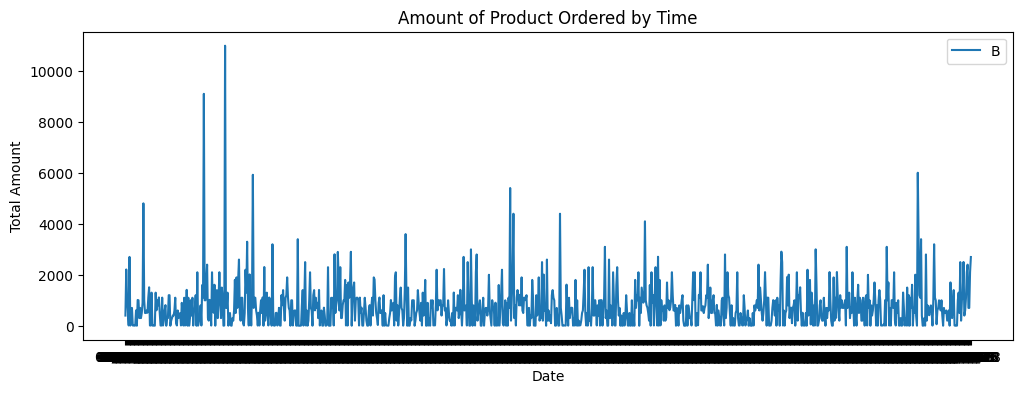

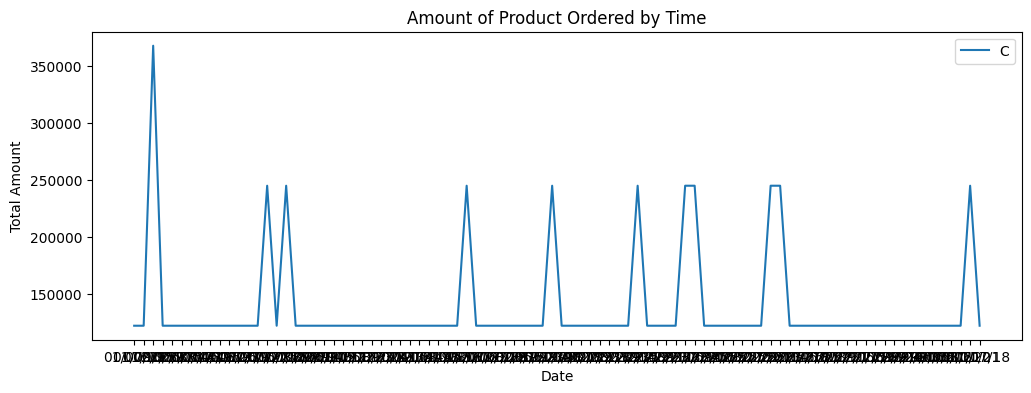

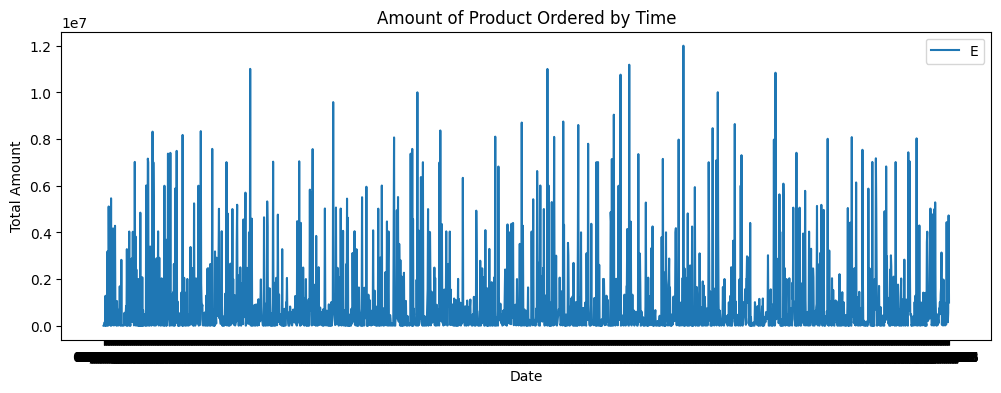

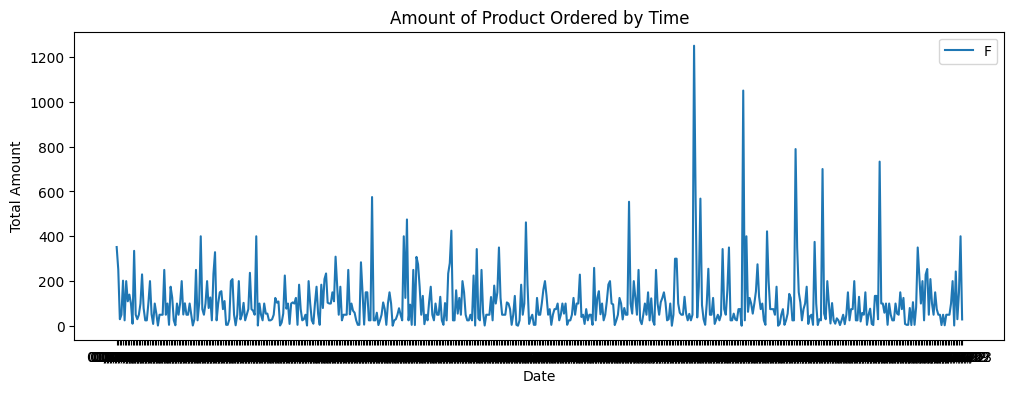

In [61]:
# Plotting the results


for product_type, group in grouped_df.groupby('PRODUCTTYPE'):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot()
    plt.plot(group['FECHAPEDIDO'], group['AMOUNT'], label=product_type)
    plt.xlabel('Date')
    plt.ylabel('Total Amount')
    plt.title('Amount of Product Ordered by Time')
    plt.legend()
    plt.show()

In [71]:
data_df['FECHAPEDIDO'] = pd.to_datetime(data_df['FECHAPEDIDO'], format='%d/%m/%y')
data_df[data_df['CODIGO']=='B40558'][data_df['ORIGEN']=='0-18-61'].sort_values(by="FECHAPEDIDO")

/var/folders/8y/krvylc452xl7sh66m66brb3r0000gn/T/ipykernel_24259/3617627297.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_df[data_df['CODIGO']=='B40558'][data_df['ORIGEN']=='0-18-61'].sort_values(by="FECHAPEDIDO")


,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO,PRODUCTTYPE,DATE,AMOUNT
5756,B40558,2016-05-12,506564/16,400505,8,1,9.90000,79.2000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2016-12-05,8
581,B40558,2016-06-02,563434/16,400505,2,1,9.90000,19.8000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2016-02-06,2
4746,B40558,2016-06-10,593686/16,400505,8,1,9.90000,79.2000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2016-10-06,8
183,B40558,2016-07-01,650868/16,400505,8,1,9.90000,79.2000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2016-01-07,8
287,B40558,2016-09-01,789555/16,400505,10,1,9.90000,99.0000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2016-01-09,10
11860,B40558,2016-12-23,1217673/16,400505,10,1,9.90000,99.0000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2016-12-23,10
5027,B40558,2017-01-11,18338/17,400505,10,1,9.90000,99.0000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2017-11-01,10
12343,B40558,2017-01-25,66841/17,400505,10,1,9.90000,99.0000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2017-01-25,10
13958,B40558,2017-03-28,238078/17,400505,10,1,9.90000,99.0000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2017-03-28,10
5214,B40558,2017-05-11,352440/17,400505,10,1,9.90000,99.0000,Compra menor,0-18-61,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15,B,2017-11-05,10
